In [ ]:
! source activate tf

# 训练SEResNet

In [ ]:
! python train.py -m SEResNet50 -p / root / work / CAPTCHA_full / model_data / KerasResNet50 / checkpoints / KerasResNet50.h5

In [ ]:
! python train.py -m SEResNet50 -p / root /.keras / models / resnet50_weights_tf_dim_ordering_tf_kernels_notop.h5

# 微调SE模块

In [ ]:
! python fineTuningSE.py -m SEResNet50 -p / root / work / CAPTCHA_full / model_data / KerasResNet50 / checkpoints / KerasResNet50.h5

# 融合模型

In [ ]:
!python mergeTuning.py

# 预测

In [5]:
import numpy as np
import config
import cv2
from cv2 import resize, imread
from keras import Model
from keras.models import load_model
import csv

from util.imageProcess import imgProcessNorm
from util.modelUtils import word_acc
from util import labelProcess
from matplotlib import pyplot as plt

In [5]:
# 加载模型
model_path = r"E:\work\pythonProject\CAPTCHA_full\model_data\VGG\checkpoints\VGG.h5"
model: Model = load_model(model_path, custom_objects={"word_acc": word_acc})


(36, 101, 3)


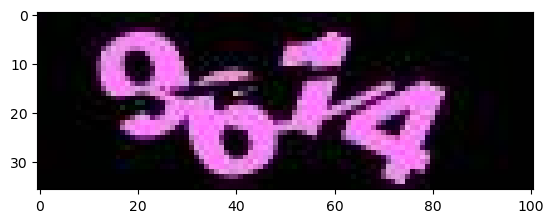

In [20]:
# 预测
pics_path1 = r"E:\yzm\test.jpg"
x1 = imread(filename=pics_path1)
print(x1.shape)
img = cv2.cvtColor(x1, cv2.COLOR_BGR2RGB)


In [7]:

x1 = imgProcessNorm(img=x1, shape=config.Model.img_shape)

x1 = x1[np.newaxis, ::]

predict = model.predict(x1)
pred = labelProcess.decode_predict(predict)
print('预测结果：' + str(pred))
# print('真实结果：' + labels[pic_name])

1/1 [==============================] - 0s 363ms/step
预测结果：['9614']


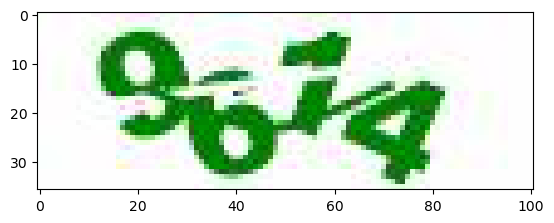

In [14]:
from PIL import Image
import matplotlib.pyplot as plt
img = Image.open(pics_path1)
# img.show() # 会调用系统的显示窗口
plt.figure('image')
plt.imshow(img)
plt.show()
